# **DATA SCIENCE PROJECT**
AIR QUALITY FORECASTING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from pandas import DatetimeIndex
from sklearn.impute import SimpleImputer

IMPORTING DATA SET

In [2]:
# Load the dataset
Air_quality = pd.read_csv('AP001.csv')
# Check for NaN values
print("Missing values before cleaning:\n", Air_quality.isnull().sum())
print(Air_quality)


Missing values before cleaning:
 From Date              0
To Date                0
PM2.5 (ug/m3)       4827
PM10 (ug/m3)        4700
NO (ug/m3)          3997
NO2 (ug/m3)         4050
NOx (ppb)           3835
NH3 (ug/m3)         5586
SO2 (ug/m3)         4865
CO (mg/m3)          4477
Ozone (ug/m3)       4583
Benzene (ug/m3)     3937
Toluene (ug/m3)     3937
Temp (degree C)     4037
RH (%)              3869
WS (m/s)            3851
WD (deg)            4494
SR (W/mt2)          4561
BP (mmHg)          57949
VWS (m/s)           3809
Xylene (ug/m3)      3950
RF (mm)             3865
AT (degree C)       4063
dtype: int64
                 From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0      2016-07-01 10:00:00  2016-07-01 11:00:00          10.67         39.00   
1      2016-07-01 11:00:00  2016-07-01 12:00:00           2.00         39.00   
2      2016-07-01 12:00:00  2016-07-01 13:00:00            NaN           NaN   
3      2016-07-01 13:00:00  2016-07-01 14:00:00            

# **PREPROCESSING AND NORMALISATION**

In [3]:
# Identify numerical columns, excluding date-related ones
date_columns = ['From Date','To Date']  # Columns containing date information
numerical_cols = [col for col in Air_quality.select_dtypes(include=['number']).columns if col not in date_columns]

# Applying mean imputation only to non-date numerical columns
mean_imputer = SimpleImputer(strategy='mean')
Air_quality[numerical_cols] = mean_imputer.fit_transform(Air_quality[numerical_cols])

print("\nDataFrame after Mean Imputation (excluding date columns):")
print(Air_quality)



DataFrame after Mean Imputation (excluding date columns):
                 From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0      2016-07-01 10:00:00  2016-07-01 11:00:00      10.670000     39.000000   
1      2016-07-01 11:00:00  2016-07-01 12:00:00       2.000000     39.000000   
2      2016-07-01 12:00:00  2016-07-01 13:00:00      29.718423     58.531252   
3      2016-07-01 13:00:00  2016-07-01 14:00:00      29.718423     58.531252   
4      2016-07-01 14:00:00  2016-07-01 15:00:00      20.500000     50.000000   
...                    ...                  ...            ...           ...   
59145  2023-03-31 19:00:00  2023-03-31 20:00:00      53.000000     70.250000   
59146  2023-03-31 20:00:00  2023-03-31 21:00:00      58.500000     88.500000   
59147  2023-03-31 21:00:00  2023-03-31 22:00:00      44.250000     80.500000   
59148  2023-03-31 22:00:00  2023-03-31 23:00:00      31.250000     59.000000   
59149  2023-03-31 23:00:00  2023-04-01 00:00:00      26.00000

In [4]:
# Extract the day from 'From' column
Air_quality['From Date'] = pd.to_datetime(Air_quality['From Date'])
Air_quality['Day'] = Air_quality['From Date'].dt.date

# Group by 'Day' and calculate the mean of numeric columns only
# Select only numeric columns before applying the aggregation
numeric_columns = Air_quality.select_dtypes(include=np.number).columns
daily_report = Air_quality.groupby('Day')[numeric_columns].agg('mean').reset_index()

# Display the daily report
print(daily_report)



             Day  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0     2016-07-01      14.734060     51.897322   14.248995    38.607201   
1     2016-07-02      25.068159     64.285886   21.685903    43.966195   
2     2016-07-03      14.162500     46.146250   12.116250    41.458750   
3     2016-07-04      10.816338     31.315677    8.549576    39.182377   
4     2016-07-05       4.718750     17.228750   15.559167    39.981667   
...          ...            ...           ...         ...          ...   
2460  2023-03-27      37.593750     61.177083   11.168333    38.981667   
2461  2023-03-28      40.843750     59.895833    7.777917    38.923333   
2462  2023-03-29      39.696601     61.511719    4.961250    32.171250   
2463  2023-03-30      49.364583     72.395833    5.115833    31.208333   
2464  2023-03-31      39.739583     60.291667    6.989167    35.660000   

      NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0     29.788065     8.074699     6

EXPLORATORY DATA ANALYSIS

In [5]:
print("Descriptive analysis:")
daily_report.describe().transpose()

Descriptive analysis:


,count,mean,std,min,25%,50%,75%,max
PM2.5 (ug/m3),2465.0,29.715890,17.888784,4.179518,15.250000,25.611952,40.083333,129.062500
PM10 (ug/m3),2465.0,58.530130,25.904257,11.679688,38.187500,56.114583,76.104167,223.166511
NO (ug/m3),2465.0,13.078161,8.779540,0.952917,6.388333,11.543333,17.556667,56.955417
NO2 (ug/m3),2465.0,39.195310,26.598895,3.803333,20.703333,33.044583,50.167500,300.621667
NOx (ppb),2465.0,31.171219,19.084635,0.000000,18.259583,27.411250,39.445310,186.872083
NH3 (ug/m3),2465.0,10.057557,5.159204,1.498750,6.555000,8.914583,11.606250,46.636667
SO2 (ug/m3),2465.0,5.782310,2.385015,1.007177,4.390833,5.332500,6.672874,22.193333
CO (mg/m3),2465.0,0.634853,0.262022,0.000000,0.425417,0.649167,0.835000,2.366250
Ozone (ug/m3),2465.0,28.679321,15.029779,1.634167,17.613333,24.897917,35.198164,101.444583
Benzene (ug/m3),2465.0,0.813854,0.598598,0.000000,0.420713,0.695417,1.080000,8.075417


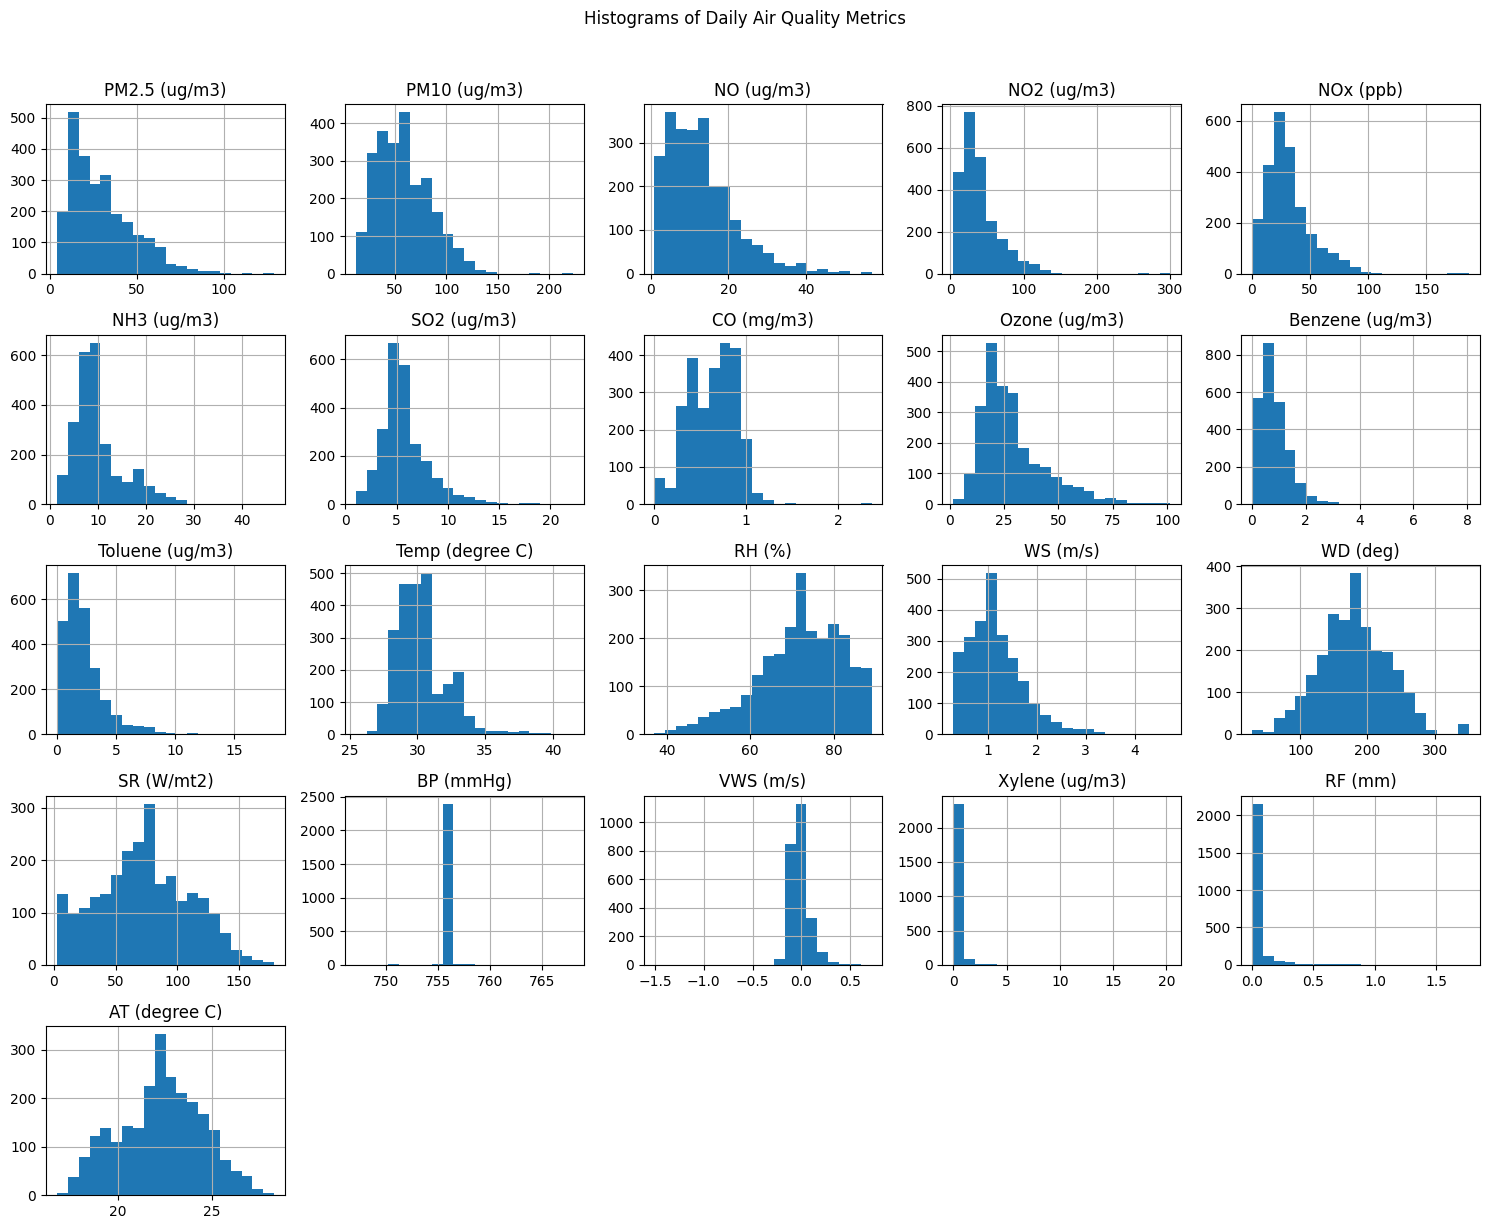

In [6]:
# Plot histograms for all numeric columns
daily_report.hist(bins=20, figsize=(15, 12))
plt.suptitle("Histograms of Daily Air Quality Metrics", y=1.02)
plt.tight_layout()
plt.show()

In [7]:
daily_report

,Day,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01,14.734060,51.897322,14.248995,38.607201,29.788065,8.074699,6.189052,0.447126,16.097350,...,33.348795,66.863919,1.967921,216.565027,73.196523,755.713988,-0.087953,0.140201,0.007503,23.672024
1,2016-07-02,25.068159,64.285886,21.685903,43.966195,38.420962,8.564538,5.242600,0.930998,18.867210,...,31.985795,67.749661,1.455584,187.212988,101.960665,755.713988,-0.064209,0.288236,0.076780,23.922344
2,2016-07-03,14.162500,46.146250,12.116250,41.458750,29.240833,8.693750,5.567593,0.763333,14.236727,...,32.721667,67.645833,1.801667,214.732917,131.191250,755.713988,0.026250,0.166667,0.187500,23.928750
3,2016-07-04,10.816338,31.315677,8.549576,39.182377,25.937803,7.724561,5.854310,0.644768,17.087385,...,31.992618,72.349673,1.499676,234.911706,81.141804,755.713988,0.058819,0.145085,0.068026,22.824080
4,2016-07-05,4.718750,17.228750,15.559167,39.981667,31.032917,7.537829,5.102177,0.752083,14.349583,...,32.851250,71.472083,1.787917,217.558750,78.406250,755.713988,0.034167,0.150000,0.086667,23.049167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2023-03-27,37.593750,61.177083,11.168333,38.981667,29.822500,9.138750,8.319583,0.970417,10.860000,...,30.856667,77.177083,0.538333,161.157964,92.458333,755.713988,-0.166250,0.962500,0.000000,25.127917
2461,2023-03-28,40.843750,59.895833,7.777917,38.923333,27.032917,8.468333,6.277083,0.877917,13.379583,...,30.922083,78.322917,0.427917,155.178389,105.843750,755.713988,-0.196250,1.717917,0.000000,24.767500
2462,2023-03-29,39.696601,61.511719,4.961250,32.171250,21.149167,8.005833,7.763750,0.838333,11.552500,...,30.811667,73.812500,0.560000,121.588789,124.052083,755.713988,-0.183333,0.672917,0.000000,24.861250
2463,2023-03-30,49.364583,72.395833,5.115833,31.208333,20.763750,8.193750,10.817917,0.854167,11.739167,...,30.388333,73.833333,0.480000,134.684662,117.239583,755.713988,-0.156667,0.643750,0.000000,25.108333


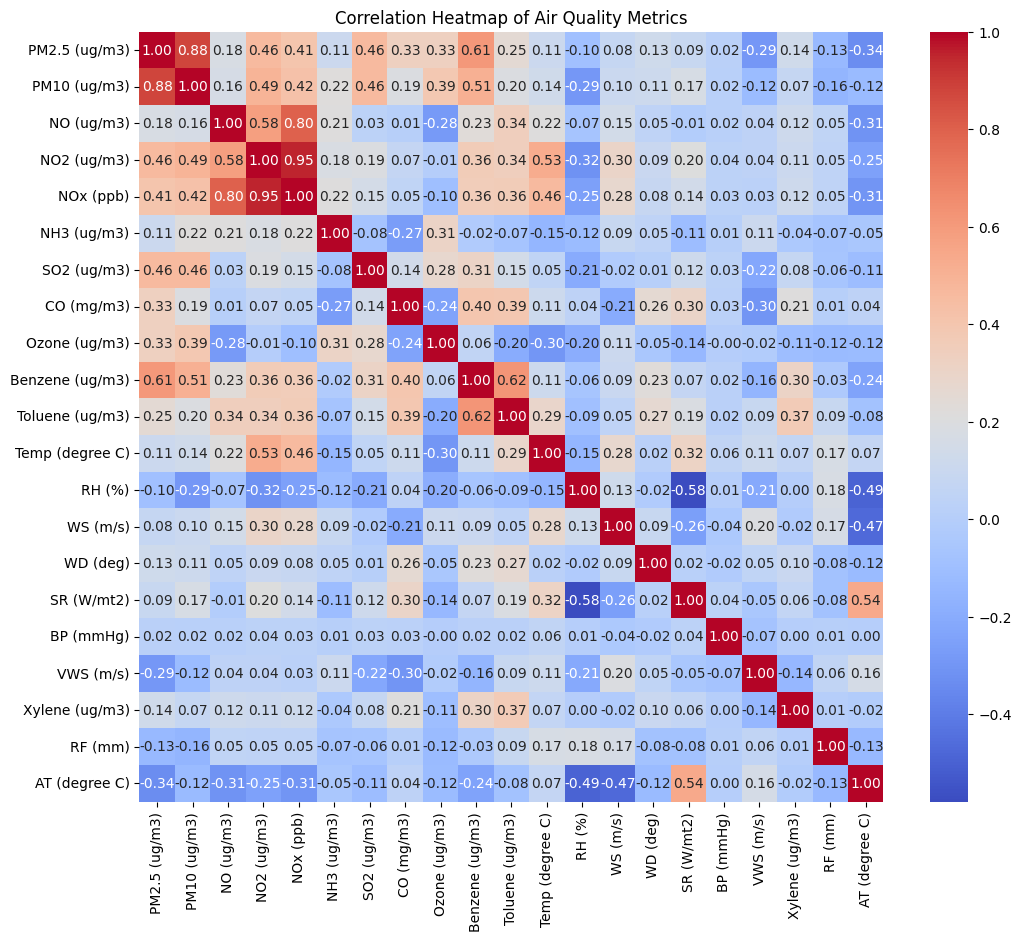

In [8]:

# Compute correlation matrix and plot a heatmap to identify relationships
df_numeric = daily_report.drop(columns=['Day'], errors='ignore')
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Air Quality Metrics")
plt.show()

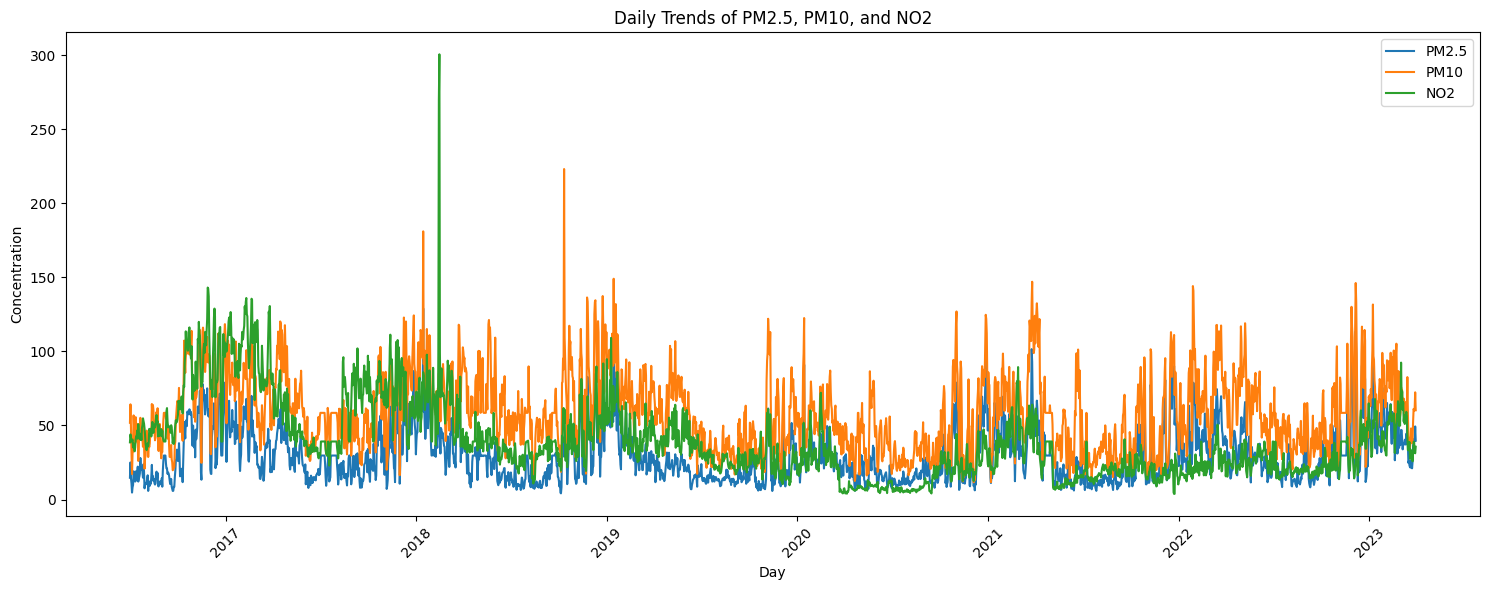

In [9]:
# Plot time series for key pollutants (example: PM2.5, PM10, NO2)
plt.figure(figsize=(15, 6))
plt.plot(daily_report['Day'], daily_report['PM2.5 (ug/m3)'], label='PM2.5')
plt.plot(daily_report['Day'], daily_report['PM10 (ug/m3)'], label='PM10')
plt.plot(daily_report['Day'], daily_report['NO2 (ug/m3)'], label='NO2')
plt.xlabel("Day")
plt.ylabel("Concentration")
plt.title("Daily Trends of PM2.5, PM10, and NO2")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


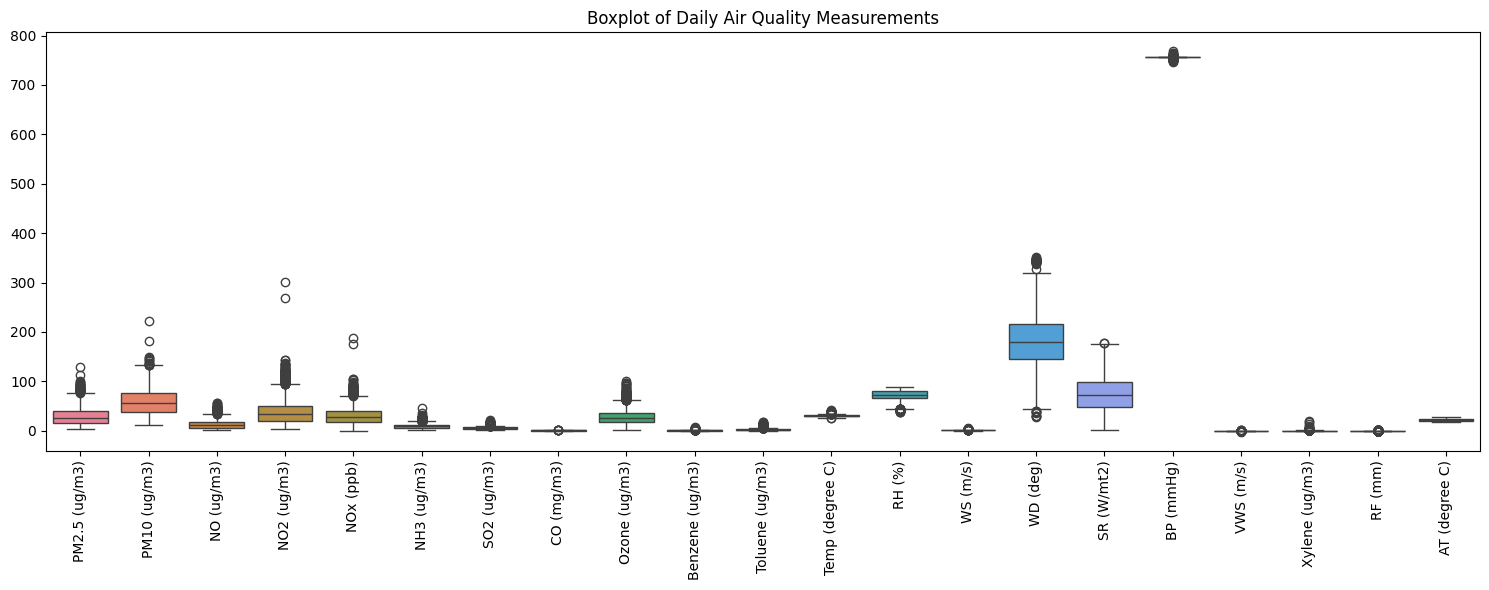

In [10]:
# 4. Outlier Detection with Boxplots
# --------------------------------------
plt.figure(figsize=(15, 6))
sns.boxplot(data=daily_report.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot of Daily Air Quality Measurements")
plt.tight_layout()
plt.show()

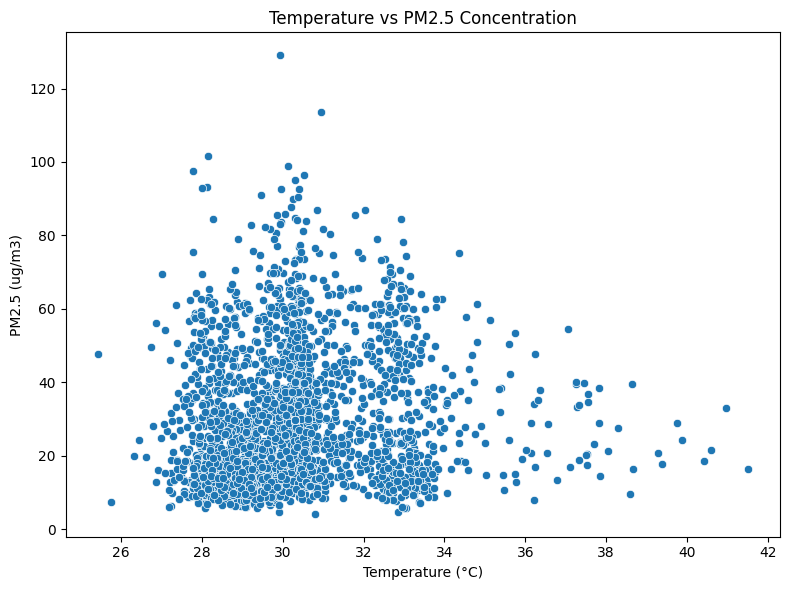

In [11]:
# Example: Relationship between Temperature and PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x=daily_report['Temp (degree C)'], y=daily_report['PM2.5 (ug/m3)'])
plt.title("Temperature vs PM2.5 Concentration")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (ug/m3)")
plt.tight_layout()
plt.show()


In [12]:
#remove  outliers
daily_report = daily_report[daily_report['PM2.5 (ug/m3)'] < daily_report['PM2.5 (ug/m3)'].quantile(0.95)]

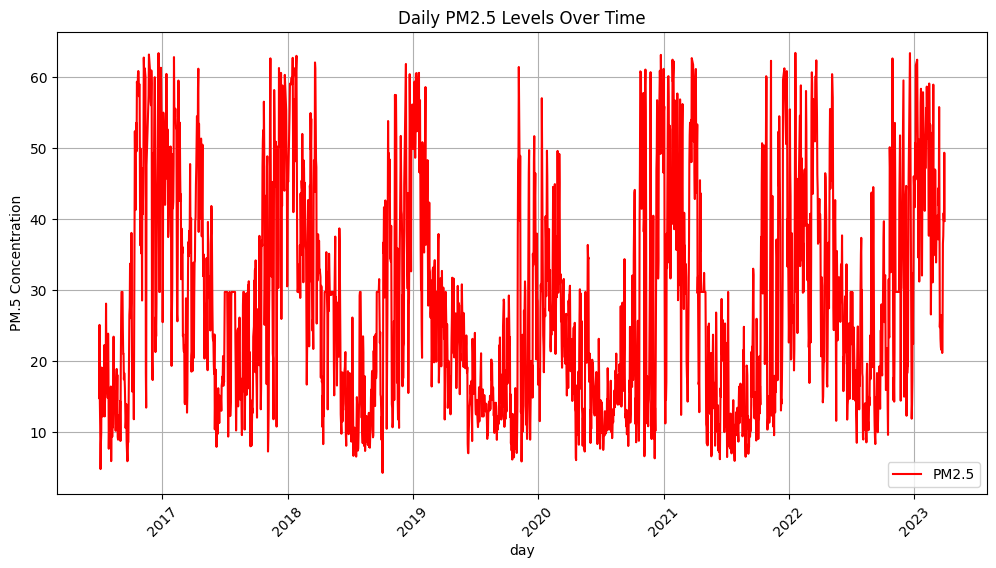

In [13]:

# Plot PM2.5 levels over time
plt.figure(figsize=(12, 6))
plt.plot(daily_report['Day'], daily_report['PM2.5 (ug/m3)'], label='PM2.5',color= 'red')
plt.xlabel('day')
plt.ylabel('PM.5 Concentration')
plt.title('Daily PM2.5 Levels Over Time')
plt.legend(markerfirst=True)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**FORECASTING USING ARIMA**

Arima

In [14]:
!pip install pmdarima
import pmdarima as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.5 MB/s eta 0:00:00


In [15]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 7.5]

#Set 'Day' as the index for proper ARIMA forecasting
#daily_report.set_index('Day', inplace=True)
print(daily_report)

             Day  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0     2016-07-01      14.734060     51.897322   14.248995    38.607201   
1     2016-07-02      25.068159     64.285886   21.685903    43.966195   
2     2016-07-03      14.162500     46.146250   12.116250    41.458750   
3     2016-07-04      10.816338     31.315677    8.549576    39.182377   
4     2016-07-05       4.718750     17.228750   15.559167    39.981667   
...          ...            ...           ...         ...          ...   
2460  2023-03-27      37.593750     61.177083   11.168333    38.981667   
2461  2023-03-28      40.843750     59.895833    7.777917    38.923333   
2462  2023-03-29      39.696601     61.511719    4.961250    32.171250   
2463  2023-03-30      49.364583     72.395833    5.115833    31.208333   
2464  2023-03-31      39.739583     60.291667    6.989167    35.660000   

      NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0     29.788065     8.074699     6

In [16]:
daily_report

,Day,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01,14.734060,51.897322,14.248995,38.607201,29.788065,8.074699,6.189052,0.447126,16.097350,...,33.348795,66.863919,1.967921,216.565027,73.196523,755.713988,-0.087953,0.140201,0.007503,23.672024
1,2016-07-02,25.068159,64.285886,21.685903,43.966195,38.420962,8.564538,5.242600,0.930998,18.867210,...,31.985795,67.749661,1.455584,187.212988,101.960665,755.713988,-0.064209,0.288236,0.076780,23.922344
2,2016-07-03,14.162500,46.146250,12.116250,41.458750,29.240833,8.693750,5.567593,0.763333,14.236727,...,32.721667,67.645833,1.801667,214.732917,131.191250,755.713988,0.026250,0.166667,0.187500,23.928750
3,2016-07-04,10.816338,31.315677,8.549576,39.182377,25.937803,7.724561,5.854310,0.644768,17.087385,...,31.992618,72.349673,1.499676,234.911706,81.141804,755.713988,0.058819,0.145085,0.068026,22.824080
4,2016-07-05,4.718750,17.228750,15.559167,39.981667,31.032917,7.537829,5.102177,0.752083,14.349583,...,32.851250,71.472083,1.787917,217.558750,78.406250,755.713988,0.034167,0.150000,0.086667,23.049167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2023-03-27,37.593750,61.177083,11.168333,38.981667,29.822500,9.138750,8.319583,0.970417,10.860000,...,30.856667,77.177083,0.538333,161.157964,92.458333,755.713988,-0.166250,0.962500,0.000000,25.127917
2461,2023-03-28,40.843750,59.895833,7.777917,38.923333,27.032917,8.468333,6.277083,0.877917,13.379583,...,30.922083,78.322917,0.427917,155.178389,105.843750,755.713988,-0.196250,1.717917,0.000000,24.767500
2462,2023-03-29,39.696601,61.511719,4.961250,32.171250,21.149167,8.005833,7.763750,0.838333,11.552500,...,30.811667,73.812500,0.560000,121.588789,124.052083,755.713988,-0.183333,0.672917,0.000000,24.861250
2463,2023-03-30,49.364583,72.395833,5.115833,31.208333,20.763750,8.193750,10.817917,0.854167,11.739167,...,30.388333,73.833333,0.480000,134.684662,117.239583,755.713988,-0.156667,0.643750,0.000000,25.108333


In [17]:
daily_rpt_5_yrs = daily_report.copy()

In [18]:
import pandas as pd
# Assuming 'daily_report' DataFrame is already loaded and preprocessed as shown in your code.
# Assuming 'daily_report' has a 'Day' column representing dates.
daily_report = daily_report.reset_index()
# Convert 'Day' column to datetime objects if it's not already
daily_report['Day'] = pd.to_datetime(daily_report['Day'])

# Define the start and end dates for the 5-year period
end_date = daily_report['Day'].max()
start_date = end_date - pd.DateOffset(years=5)

# Filter the DataFrame to include only the data within the 5-year period
daily_rpt_5_yrs = daily_report[(daily_report['Day'] >= '2016-01-01') & (daily_report['Day'] <= '2021-12-31')]

# Now daily_rpt_5_yrs contains the data for the last 5 years
daily_rpt_5_yrs

,index,Day,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,0,2016-07-01,14.734060,51.897322,14.248995,38.607201,29.788065,8.074699,6.189052,0.447126,...,33.348795,66.863919,1.967921,216.565027,73.196523,755.713988,-0.087953,0.140201,0.007503,23.672024
1,1,2016-07-02,25.068159,64.285886,21.685903,43.966195,38.420962,8.564538,5.242600,0.930998,...,31.985795,67.749661,1.455584,187.212988,101.960665,755.713988,-0.064209,0.288236,0.076780,23.922344
2,2,2016-07-03,14.162500,46.146250,12.116250,41.458750,29.240833,8.693750,5.567593,0.763333,...,32.721667,67.645833,1.801667,214.732917,131.191250,755.713988,0.026250,0.166667,0.187500,23.928750
3,3,2016-07-04,10.816338,31.315677,8.549576,39.182377,25.937803,7.724561,5.854310,0.644768,...,31.992618,72.349673,1.499676,234.911706,81.141804,755.713988,0.058819,0.145085,0.068026,22.824080
4,4,2016-07-05,4.718750,17.228750,15.559167,39.981667,31.032917,7.537829,5.102177,0.752083,...,32.851250,71.472083,1.787917,217.558750,78.406250,755.713988,0.034167,0.150000,0.086667,23.049167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,2005,2021-12-27,54.166667,74.718750,9.810417,26.307917,21.973750,6.790417,8.700000,0.862083,...,30.110417,79.468750,0.603750,135.093750,93.447917,755.713988,-0.047083,1.264583,0.000000,20.705417
1917,2006,2021-12-28,33.279123,52.359948,9.053156,24.426578,20.259590,8.156468,5.294404,0.756008,...,30.824831,78.749459,0.938880,194.775889,92.030609,755.713988,-0.011653,0.253535,0.015319,21.563629
1918,2007,2021-12-29,40.072917,52.406250,6.108750,15.970833,13.460000,7.585417,3.921250,0.838333,...,30.255833,86.010417,0.898333,201.534583,49.791667,755.713988,-0.008333,0.266934,0.000000,20.657083
1919,2008,2021-12-30,35.467434,47.845052,5.729583,15.053750,12.669167,7.192500,5.385000,0.781667,...,30.353750,86.520833,1.495417,218.385417,37.906250,755.713988,-0.053750,0.212083,0.040833,19.992917


In [19]:
# prompt: dailyreport data  with only pm.5,pm10,NO,NO2,benzene collumns

daily_rpt_5_yrs = daily_rpt_5_yrs[['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'Benzene (ug/m3)']]
daily_rpt_5_yrs


,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),Benzene (ug/m3)
0,14.734060,51.897322,14.248995,38.607201,0.696268
1,25.068159,64.285886,21.685903,43.966195,0.864786
2,14.162500,46.146250,12.116250,41.458750,0.635000
3,10.816338,31.315677,8.549576,39.182377,0.559974
4,4.718750,17.228750,15.559167,39.981667,0.601667
...,...,...,...,...,...
1916,54.166667,74.718750,9.810417,26.307917,0.665833
1917,33.279123,52.359948,9.053156,24.426578,0.782797
1918,40.072917,52.406250,6.108750,15.970833,0.698495
1919,35.467434,47.845052,5.729583,15.053750,0.469167


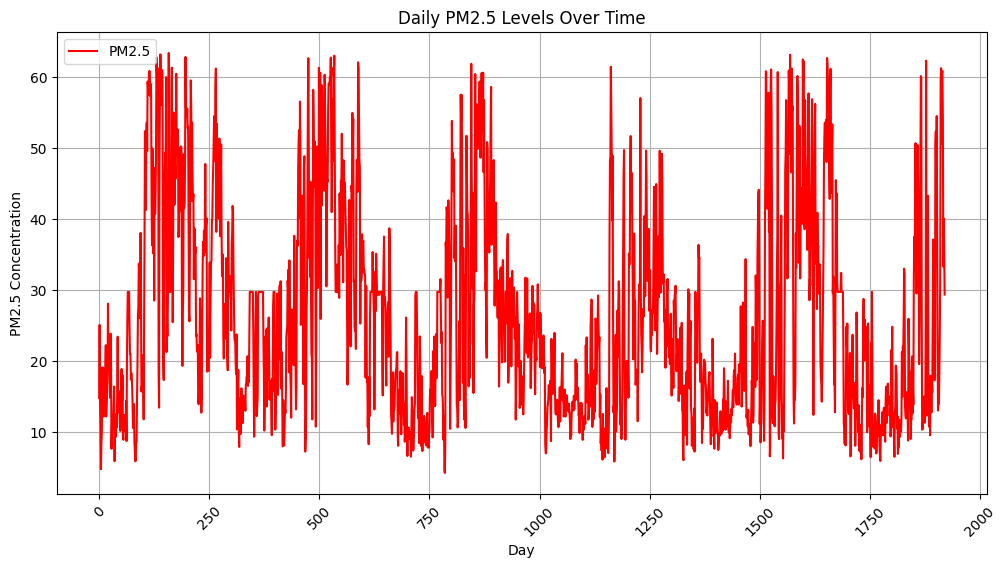

In [20]:
# prompt: plot pm2.5

import matplotlib.pyplot as plt
# Assuming 'daily_report' DataFrame is already loaded and preprocessed.

plt.figure(figsize=(12, 6))
plt.plot(daily_rpt_5_yrs.index, daily_rpt_5_yrs['PM2.5 (ug/m3)'], label='PM2.5', color='red')
plt.xlabel('Day')
plt.ylabel('PM2.5 Concentration')
plt.title('Daily PM2.5 Levels Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


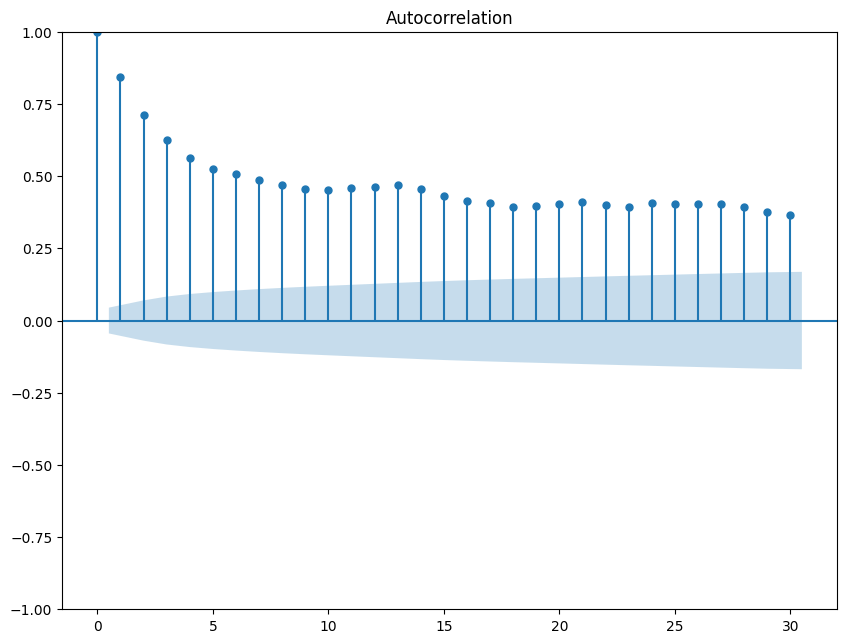

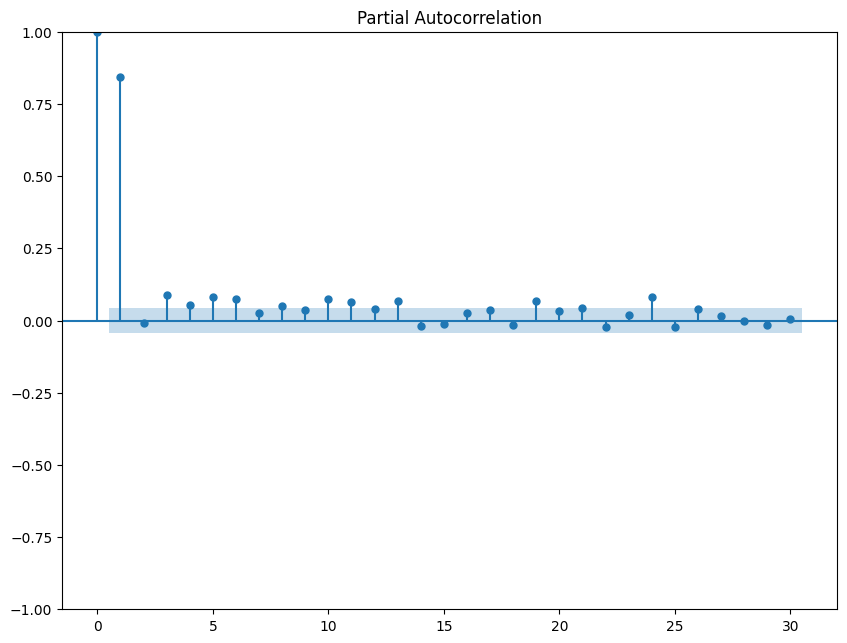

In [21]:
# Plot ACF and PACF to identify AR and MA terms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(daily_rpt_5_yrs['PM2.5 (ug/m3)'], lags=30)
plt.show()

plot_pacf(daily_rpt_5_yrs['PM2.5 (ug/m3)'], lags=30)
plt.show()

In [22]:
#adfuller test to generate the critical values
result = adfuller(daily_rpt_5_yrs['PM2.5 (ug/m3)'], autolag='AIC')

# Extract and print the test results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key, value))

ADF Statistic: -3.637282415787359
p-value: 0.005086991249254943
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

def find_best_aic_model(data, max_p, max_d, max_q):
    """
    Finds ARIMA model with lowest AIC using loop.
    """
    best_aic = np.inf
    best_model = None
    best_order = None
    for p, d, q in product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
        try:
            model = SARIMAX(data, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model_fit
                best_order = (p, d, q)
        except Exception as e:
            continue  # Ignoring errors during fitting the model
    return best_order, best_aic

# Set the maximum values for p, d,and q
max_p = 8
max_d = 0
max_q = 4


# Running the grid search on the log data
best_order, best_aic = find_best_aic_model(daily_rpt_5_yrs['PM2.5 (ug/m3)'], max_p, max_d, max_q) # Now using the column in the DataFrame
best_order, best_aic

((8, 0, 3), 13260.538258380237)

In [24]:
#splitting into training and test data
train_size = int(len(daily_rpt_5_yrs) * 0.8)
train_data = daily_rpt_5_yrs[:train_size]
test_data = daily_rpt_5_yrs[train_size:]

In [25]:
# Fit ARIMA model on the training dataset
model = ARIMA(train_data['PM2.5 (ug/m3)'],
              order=best_order,exog = train_data[['PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)']])
model_fit = model.fit()

In [26]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test_data),
                              exog = test_data[['PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)']])

In [27]:
forecast_index = pd.date_range(start=pd.to_datetime(test_data.index[0]) + pd.Timedelta(days=1), periods=len(test_data), freq='D')


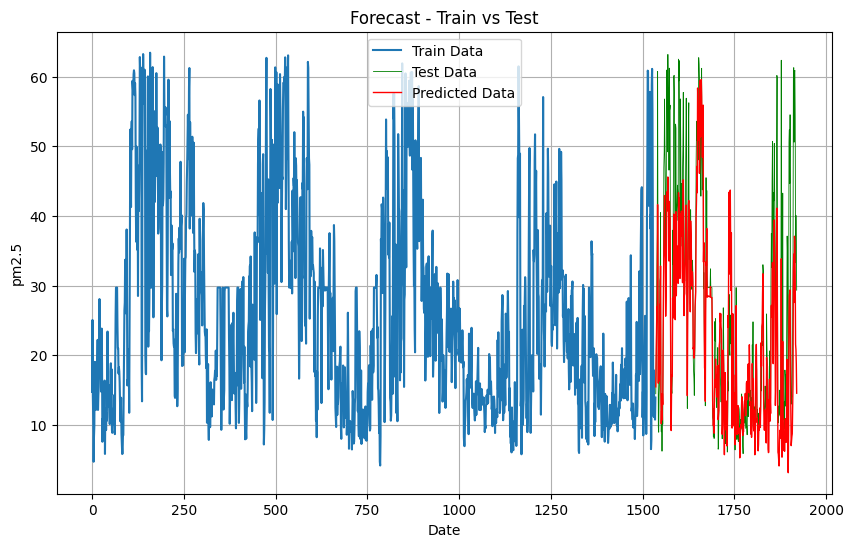

In [28]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['PM2.5 (ug/m3)'],
         label="Train Data")
plt.plot(test_data.index, test_data['PM2.5 (ug/m3)'],
         label="Test Data",color = 'green',linewidth = '0.6')
plt.plot(test_data.index, forecast,
         label="Predicted Data", color='red',linewidth = '1')
plt.title("Forecast - Train vs Test")
plt.xlabel("Date")
plt.ylabel("pm2.5")
plt.legend()
plt.grid()
plt.show()

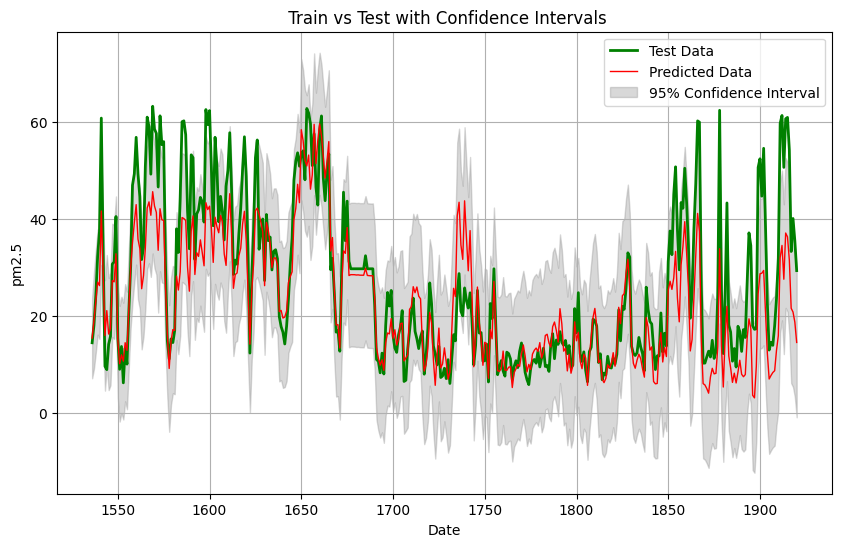

In [29]:
forecast = model_fit.forecast(
    steps=len(test_data),
    exog=test_data[['PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)']],
)

# Get confidence intervals separately
conf_int = model_fit.get_forecast(steps=len(test_data),
exog=test_data[['PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)']]).conf_int(alpha=0.05)

# Plot train, test, and forecast data
plt.figure(figsize=(10, 6))
#plt.plot(train_data.index, train_data["Close"], label="Train Data")
plt.plot(test_data.index, test_data["PM2.5 (ug/m3)"], label="Test Data",
         color="green", linewidth=2)
plt.plot(test_data.index, forecast, label="Predicted Data",
         color="red", linewidth=1)

# Fill the confidence interval area
# Access confidence intervals using the correct column names
plt.fill_between(
    test_data.index,
    conf_int['lower PM2.5 (ug/m3)'],  # Lower bound - Updated column name
    conf_int['upper PM2.5 (ug/m3)'],  # Upper bound - Updated column name
    color="gray",
    alpha=0.3,
    label="95% Confidence Interval",
)

# Enhance the plot
plt.title(" Train vs Test with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("pm2.5")
plt.legend()
plt.grid()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'forecast' contains the predicted values and 'test_data' contains the actual values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['PM2.5 (ug/m3)'], forecast)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['PM2.5 (ug/m3)'], forecast)

# Calculate R-squared (R2)
r2 = r2_score(test_data['PM2.5 (ug/m3)'], forecast)

# Print the evaluation metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 77.56180930883119
RMSE: 8.80691826400309
MAE: 6.372388253110498
R2: 0.7117897127983297


# **Random Forest Regression**

In [31]:
from sklearn.ensemble import RandomForestRegressor # for building random forest models
from sklearn.preprocessing import StandardScaler # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
predictors = daily_rpt_5_yrs[['PM10 (ug/m3)', 'NO (ug/m3)','NO2 (ug/m3)','Benzene (ug/m3)']]
target = daily_rpt_5_yrs['PM2.5 (ug/m3)']

In [33]:
# Extract feature matrix (X) and target vector (y)
X = predictors.values
y = target.values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Build the random forest model
RFfit = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
RFfit.fit(X_train, y_train)
y_pred = RFfit.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 33.2691
R² Score: 0.8160


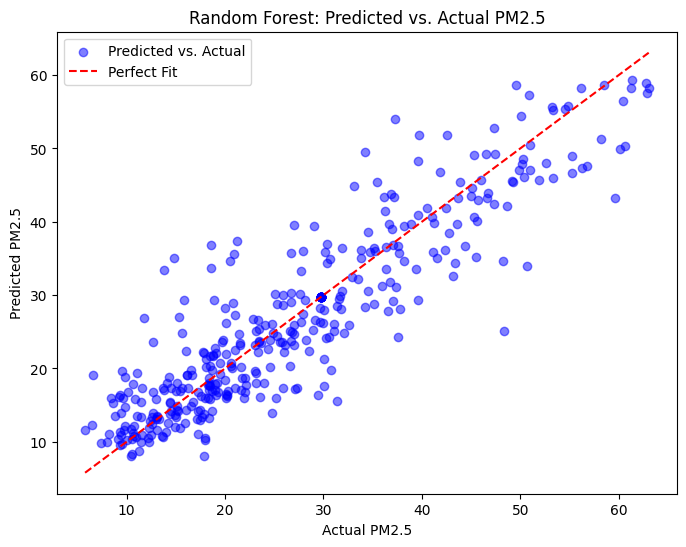

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Fit")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Random Forest: Predicted vs. Actual PM2.5")
plt.legend()
plt.show()


In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # More trees can improve accuracy
    'max_depth': [10, 15, 20],         # Try deeper trees
    'min_samples_split': [2, 5, 10],   # Controls splits in trees
    'min_samples_leaf': [1, 2, 4]      # Controls minimum data per leaf
}

# Perform Randomized Search
grid_search = RandomizedSearchCV(RFfit, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42)
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


In [39]:
best_rf_model = grid_search.best_estimator_  # Get the best tuned model

In [40]:
y_pred_tuned = best_rf_model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

# Calculate R² score
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"New R² Score after tuning: {r2_tuned:.4f}")


New R² Score after tuning: 0.8129


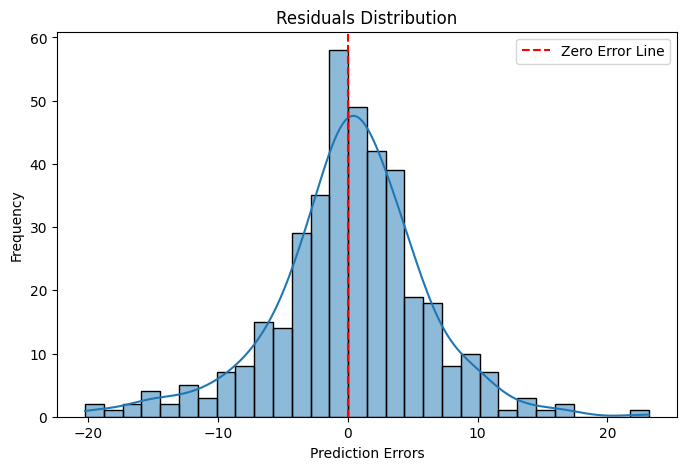

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error Line")
plt.title("Residuals Distribution")
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.legend()
plt.show()


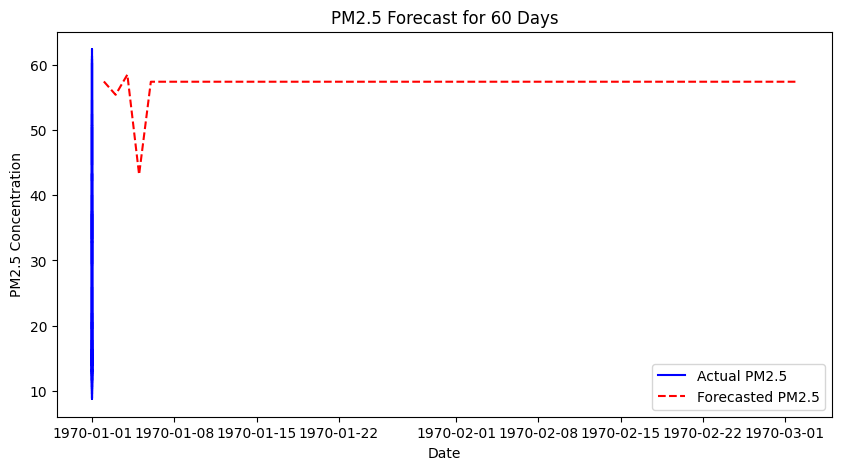

In [43]:
import pandas as pd
import numpy as np

# Convert the index of daily_rpt_5_yrs to DateTimeIndex if it's not already
daily_rpt_5_yrs.index = pd.to_datetime(daily_rpt_5_yrs.index)

# forecast_index = pd.date_range(start=pd.to_datetime(test_data.index[0]) + pd.Timedelta(days=1), periods=len(test_data), freq='D')
# Generate the date range for the next 60 days
forecast_index = pd.date_range(start=daily_rpt_5_yrs.index[-1] + pd.DateOffset(days=1), periods=60, freq='D')


# Use the last available data as input
last_known_data = daily_rpt_5_yrs[['PM10 (ug/m3)', 'NO (ug/m3)','NO2 (ug/m3)','Benzene (ug/m3)']].iloc[-1, :].values.reshape(1, -1)

# Make predictions for 60 days
future_predictions = []
for _ in range(60):
    pred = best_rf_model.predict(last_known_data)
    future_predictions.append(pred[0])

    # Update last_known_data by shifting and adding new prediction
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = pred[0]  # Assuming PM2.5 is the last column

# Convert to DataFrame
forecast_df = pd.DataFrame({'Date': forecast_index, 'Predicted_PM2.5': future_predictions})
forecast_df.set_index('Date', inplace=True)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_rpt_5_yrs.index[-100:], daily_rpt_5_yrs['PM2.5 (ug/m3)'].tail(100), label="Actual PM2.5", c='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_PM2.5'], label="Forecasted PM2.5", c='red', linestyle='dashed')
plt.title("PM2.5 Forecast for 60 Days")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.show()

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
GBR = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
GBR.fit(X_train, y_train)

# Predict on test data
y_pred_gbr = GBR.predict(X_test)

# Evaluate performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse_gbr:.4f}")
print(f"Gradient Boosting R² Score: {r2_gbr:.4f}")


Gradient Boosting MSE: 34.0241
Gradient Boosting R² Score: 0.8118


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 70, 80],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from tuning
best_gbr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned GBR
y_pred_best_gbr = best_gbr.predict(X_test)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)
print(f"Tuned GBR R² Score: {r2_best_gbr:.4f}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}
Tuned GBR R² Score: 0.8213


# **LSTM** **MODEL**

In [ ]:
lstm_data= daily_rpt_5_yrs.copy()

In [ ]:
# Use multiple features for the LSTM model
from sklearn.preprocessing import MinMaxScaler
features = ['PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)','Benzene (ug/m3)']
target = 'PM2.5 (ug/m3)'
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

In [ ]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

# Visualize the scaled data and the train-test split
plt.figure(figsize=(12, 6))
train_size = int(0.7 * len(scaled_data))
train, test = scaled_data[:train_size], scaled_data[train_size:]
split_index = train_size  # For visualization

# Visualize the train-test split using the target column (PM2.5)
target_index = features.index(target)
scaled_target = scaled_data[:, target_index]

plt.figure(figsize=(12, 6))
plt.plot(range(train_size), scaled_target[:train_size], label='Training Data', color='blue', alpha=0.5)
plt.plot(range(train_size, len(scaled_target)), scaled_target[train_size:], label='Testing Data', color='orange', alpha=0.5)
plt.axvline(split_index, color='red', linestyle='--', label='Train-Test Split')
plt.title('Train-Test Split Visualization')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# Create Timeseries Generators
# ------------------------------
# We'll use a look-back (history length) of 50 timesteps.
look_back = 50

# IMPORTANT: Since we want to predict only PM2.5, we set the target for the generator
# to be the PM2.5 column (i.e. column at index target_index)
train_generator = TimeseriesGenerator(train, train[:, target_index], length=look_back, batch_size=16)
test_generator = TimeseriesGenerator(test, test[:, target_index], length=look_back, batch_size=1)


In [ ]:
n_features = scaled_data.shape[1]  # Number of features (5)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predict one value: PM2.5
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

In [ ]:
#traininig the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator, verbose=1)

In [ ]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [ ]:
def predict_future_days(model, base_data, days_to_predict, scaler, look_back,features):
    # Start with the last days of the base data
    input_data = base_data[-look_back:].reshape(1, look_back, len(features))
   # Predict future days
    future_predictions = []

    for _ in range(days_to_predict):
        # Make a prediction
        prediction = model.predict(input_data)

        # Append the prediction
        future_predictions.append(prediction[0, 0])

        # Update the input data to include the prediction and exclude the oldest data point
        # Correctly reshape the prediction to (1, 1, 1) before appending
        input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Invert the scaling
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions



In [ ]:


# Evaluate the model
loss, mae = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test MAPE: {mae}")

In [ ]:
# Inverse scaling to get original scale of the data

import numpy as np
import matplotlib.pyplot as plt

# Generate predictions on the test data
lstm_predictions = model.predict(test_generator)

lstm_predictions = lstm_predictions.reshape(-1, 1)  # Reshape to (n_samples, 1)
lstm_predictions = scaler.inverse_transform(np.repeat(lstm_predictions, len(features), axis=1))[:, 0]  # Inverse transform and select the first column (PM2.5)

# Extract actual values from the test set
# get the index of the target column in scaled_data
target_index = features.index(target)
#get all the test data before inverse_transform
test_data = test
#select all the data at look_back index and afterwards
test_data = test_data[look_back:]
#inverse transform this data using our scaler and select the target_index column
actual_values = scaler.inverse_transform(test_data)[:, target_index]
# Plot the data
plt.figure(figsize=(15,5))
#Remove actual_prices since that variable does not exist and use actual_values
plt.plot(actual_values, color='blue', label='Actual PM2.5')
plt.plot(lstm_predictions, color='green', label='forcaste with lstm')
plt.title('Prediction')
plt.xlabel('Days')
plt.ylabel('PM2.5')
plt.legend()
plt.show()